# STUTERN GRADUATE ACCELERATOR PROGRAM

### DATA SCIENCE ASSESSMENT ON IBM EMPLOYEE ATTRITION
#### by: Oni Segun John

<br>

## Import Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

## Connet to the database and read data into memory

The data base for this analysis was downloaded from the [Google Drive](https://drive.google.com/file/d/13cdx4kWB6-WZe1VTjPqnFRgYzzGZHt2x/view) link provided in the data science [assessment](https://bit.ly/DATASCIENCE14B) session after completing the enrollment form.

The dataset was then read to read to memory with `pandas`.

In [2]:
# Connect to SQLite database
conn = sqlite3.connect("attr_data.db")

# Reading the database to memory with pandas
df = pd.read_sql_query(
    "SELECT * FROM attrition_records", 
    conn, 
    index_col=['id']
)

## Exploring the Dataset

In [3]:
# Viewing the first 5 rows of the dataset
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
id,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
3,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
4,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
5,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.shape
print(f"The shape of the dataset is: {df.shape}")

The shape of the dataset is: (1470, 35)


This shows that the dataset has `35 columns` and 1470 rows.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 1 to 1470
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

The simple exploration above shows that the dataset is good for analysis, with no missing values and correct data type for each features of the dataset.

In [6]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


### Checking for Missing Data

In [7]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

The above shows that the dataset has no missing value.

## ANALYSIS

### What do you think are the 3 factors behind employee attrition?


Attrition is the departure of employees from the organization for any reason (voluntary or involuntary), including resignation, termination, death or retirement. 

According to [ORACLE NETSUITE](https://www.netsuite.com/portal/resource/articles/human-resources/employee-turnover-causes.shtml), the top ten causes of employee attrirtion are:
1. Lack of employee purpose
2. Poor compensation
3. Being overworked
4. Bad managers
5. Little to no feedback or recognition
6. Poor work/life balance
7. Boredom
8. No opportunity for growth or development
9. Bad hiring procedure
10. Toxic or negative culture

In [8]:
# Function defining titles and labels going forward
def x_y_t(xL, yL, title):
    plt.title(title, fontsize=12)
    plt.xlabel(xL, fontsize=10)
    plt.ylabel(yL, fontsize=10);

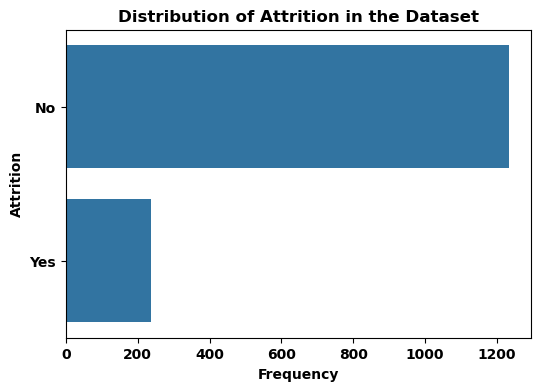

This count of Attrition in the dataset is :
No     1233
Yes     237
Name: Attrition, dtype: int64

This pecentage of Attrition in the dataset is :
No     83.877551
Yes    16.122449
Name: Attrition, dtype: float64


In [9]:
# Setting the Index in prep for barh
type_order = df["Attrition"].value_counts().index

# Plotting thw Distributions of Listing Category
fig, ax = plt.subplots(figsize=(6, 4))
base_color = sb.color_palette()[0]
sb.countplot(data=df, y='Attrition', color=base_color,  order=type_order)

# Funtion definig labels and title
x_y_t(
    'Frequency', 
    'Attrition', 
    'Distribution of Attrition in the Dataset'
)
plt.show();

print("This count of Attrition in the dataset is :")
print(df["Attrition"].value_counts())

print()

print("This pecentage of Attrition in the dataset is :")
print(df["Attrition"].value_counts(normalize=True) * 100)


Looking at the percentage of Attition in our dataset, it will be intereting to know the cause of `Attrition`. I'll focus on threee out of the ten listed casues of attrition.

<br>

### 1. JOB SATISFACTION

In [10]:
# Group Attrition by JobSatisfaction
df.groupby('Attrition')['JobSatisfaction'].value_counts().unstack(level=-1)

JobSatisfaction,1,2,3,4
Attrition,,,,
No,223,234,369,407
Yes,66,46,73,52


The Above result shows NO-Attrition and JobSatisfaction has a proportional relationship; which implies that the Higher the satisfaction score the higher the NO-Attrition number. However, its is difficult to clearly see the relationship between the YES-Attrition and JobSatisfaction.

For this, I will covert the above values to percentages to know the direct inpact of jobSatisfaction on Attrition number

In [11]:
# Normalize the value counts of groupby value
df.groupby(
    'Attrition'
    )['JobSatisfaction'].value_counts(normalize=True).unstack(level=-1)

JobSatisfaction,1,2,3,4
Attrition,,,,
No,0.180860,0.189781,0.299270,0.330089
Yes,0.278481,0.194093,0.308017,0.219409


The above puts the relationship between Attrition and JobSatisfaction in a better light. This clearly shows that the higher the JobSatisfaction Rate the lesser the YES-Attrition number. 

This clearly shows that Job Satisfaction does impact Attrition.

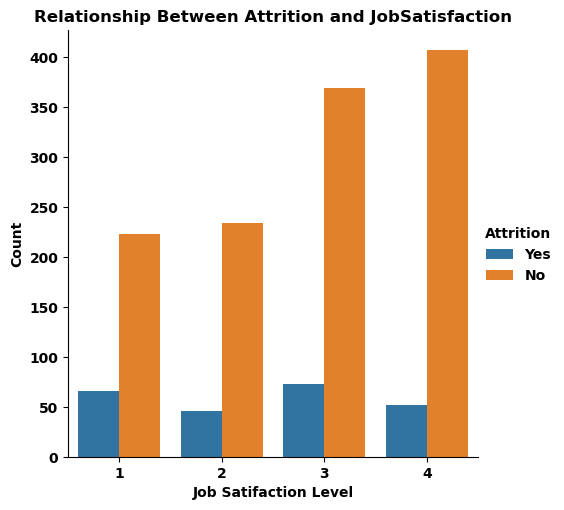

In [12]:
sb.catplot(data=df,kind='count', x='JobSatisfaction', hue='Attrition')
# Funtion definig labels and title
x_y_t(
    'Job Satifaction Level', 
    'Count', 
    'Relationship Between Attrition and JobSatisfaction'
)



### 2. MONTHLY INCOME

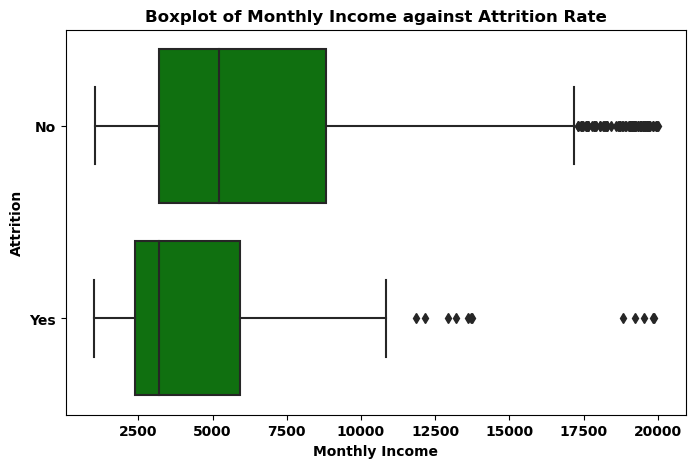

In [13]:
# Creating the order for box plot
order = df.Attrition.value_counts().index

# box plot of MonthlyIncome and Attrition
plt.figure(figsize=(8, 5))
sb.boxplot(
    data=df, 
    y='Attrition', 
    x='MonthlyIncome', 
    color='Green', 
    order = order);

# Funtion definig labels and title
x_y_t(
    "Monthly Income",
    "Attrition", 
    "Boxplot of Monthly Income against Attrition Rate"
)


The Boxplot above shows that monthly Income is also a factor that contributes to employee attrition. We can see that most employees that leave their work place earns averagely lower than those who do not.

The outliers show that MonthlyIncome, alone, may still not may some employees leave. it will be interesting to see why else employees leave in addition to low MonthlyIncome.

### 3. TRAINING TIME (EMPLOYEE DEVELOPMENT)

In [27]:
# Values of TrainingTimesLastYear
df.TrainingTimesLastYear.value_counts().sort_values()

0     54
6     65
1     71
5    119
4    123
3    491
2    547
Name: TrainingTimesLastYear, dtype: int64

This shows that the highest numbers of time employees were tained during the year was 2 to 5 times. We shall see the impact of this on Attrition.

In [25]:
# Group Attrition by TrainingTimesLastYear
df.groupby(
    'Attrition'
    )['TrainingTimesLastYear'].value_counts().unstack(level=-1)

TrainingTimesLastYear,0,1,2,3,4,5,6
Attrition,,,,,,,
No,39,62,449,422,97,105,59
Yes,15,9,98,69,26,14,6


In [24]:
# normalize the value counts
norml = df.groupby(
    'Attrition'
    )['TrainingTimesLastYear'].value_counts(normalize=True).unstack(level=-1)
norml

TrainingTimesLastYear,0,1,2,3,4,5,6
Attrition,,,,,,,
No,0.031630,0.050284,0.364152,0.342255,0.078670,0.085158,0.047851
Yes,0.063291,0.037975,0.413502,0.291139,0.109705,0.059072,0.025316


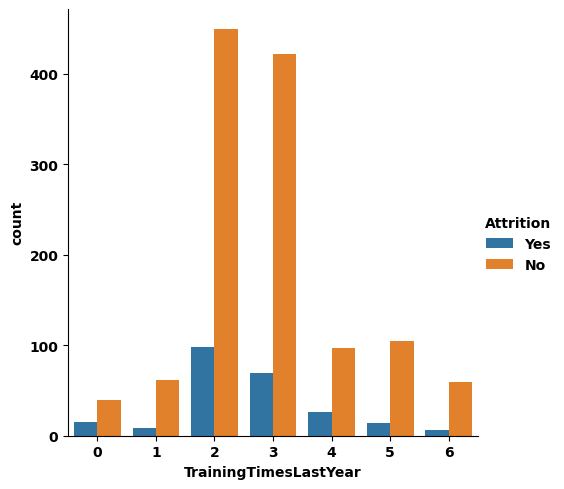

In [23]:
# plotting the catplot
sb.catplot(data=df, kind='count', x='TrainingTimesLastYear', hue='Attrition')

# Funtion definig labels and title
# x_y_t('Loan Term', 'Count', 'Count of Different Loan Terms')

The number of times employees are trained in a year does matter. The Optima number of times employees should be trained is 2 - 3 times a year. Employees tend to leave an organization where they do not get developed or they are pushed too hard.

It may be that too much training, ususally beyond 3 times a year, is seen as too much or a window to get better employment.

<br>

## What is the relationship between Education and Monthly Income?

In [28]:
# Getting the unique values of education
df['Education'].unique()

array([2, 1, 4, 3, 5], dtype=int64)

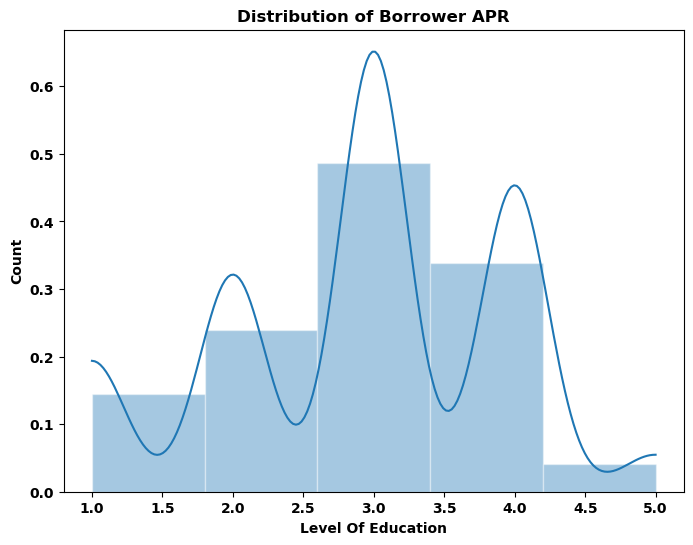

In [41]:
# Plotting the distribution Education in the dataset
plt.figure(figsize = [8, 6])
sb.histplot(
    df['Education'], 
    kde=True, 
    stat="density", 
    alpha=.4, 
    edgecolor=(1, 1, 1, .4), 
    bins=5);

# Funtion definig labels and title
x_y_t('Level Of Education', 'Count', 'Distribution of Borrower APR');

In [59]:
new = df[['Education', 'MonthlyIncome']]
new

,Education,MonthlyIncome
id,,
1,2,5993
2,1,5130
3,2,2090
4,4,2909
5,1,3468
...,...,...
1466,2,2571
1467,1,9991
1468,3,6142


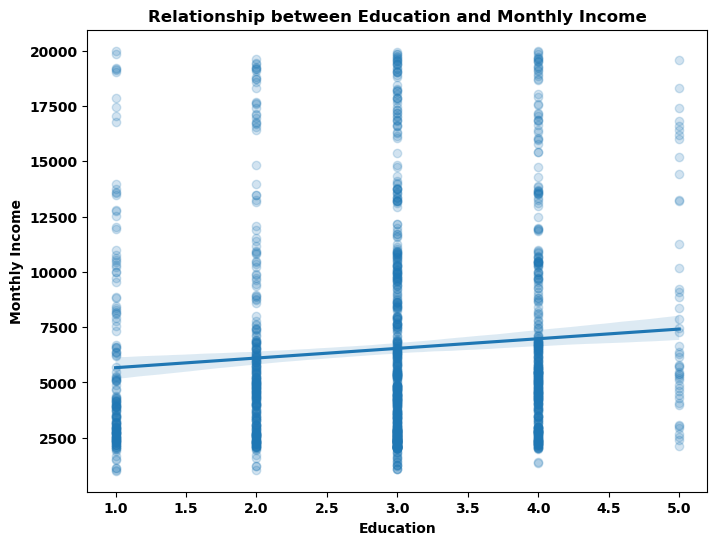

In [63]:
# Relatinship plot between both variables
plt.figure(figsize = [8, 6])
sb.regplot(
    data = df, 
    y ='MonthlyIncome', 
    x='Education', 
    scatter_kws={'alpha':0.2}
);

# Funtion definig labels and title
x_y_t(
    "Education",
    "Monthly Income", 
    "Relationship between Education and Monthly Income"
)

The scatter plot above suggest that Education and Monthly Income have little relationship. Education does not guarantee a higher Income.

The plot somehow shows a positive corellation between education and Monthly Income around 5000 to 7500 Income.

### What is the effect of age on attrition?

In [64]:
df.groupby('Attrition')['Age'].value_counts().unstack(level=-1)

Age,18,19,20,21,22,23,24,25,26,27,...,51,52,53,54,55,56,57,58,59,60
Attrition,,,,,,,,,,,,,,,,,,,,,
No,4.0,3.0,5.0,7.0,11.0,10.0,19.0,20.0,27.0,45.0,...,17.0,15.0,17.0,18.0,19.0,11.0,4.0,9.0,10.0,5.0
Yes,4.0,6.0,6.0,6.0,5.0,4.0,7.0,6.0,12.0,3.0,...,2.0,3.0,2.0,NaN,3.0,3.0,NaN,5.0,NaN,NaN


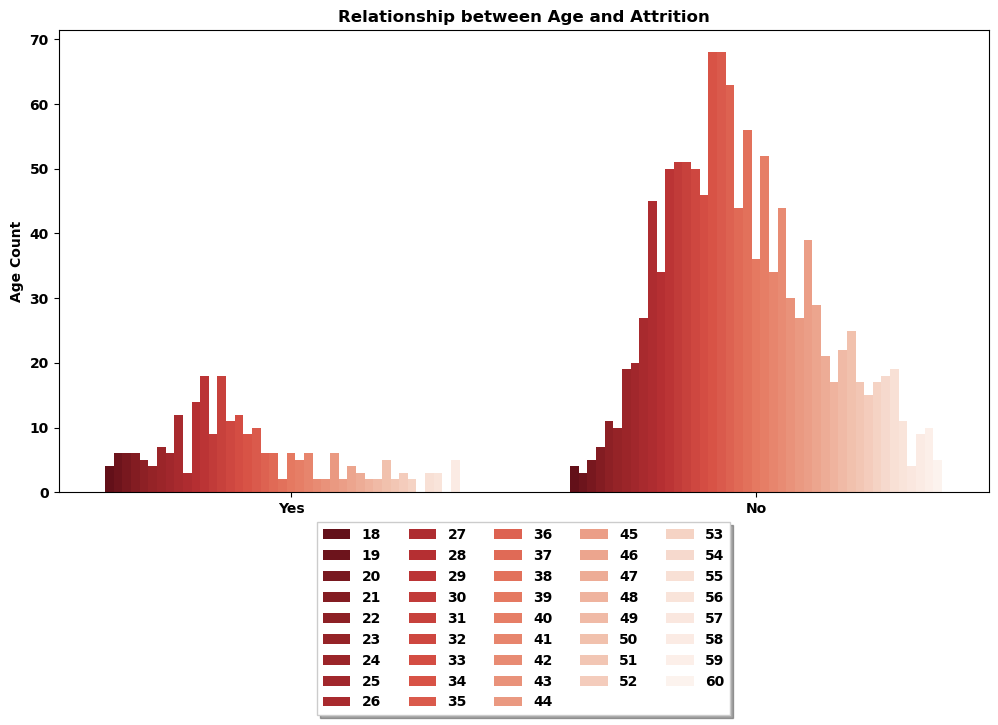

In [70]:
# plotting the Term of loan
plt.figure(figsize = [12, 6])
base_color = sb.color_palette()[0]
sb.countplot(
    data = df, 
    x = 'Attrition', 
    hue='Age', 
    palette = 'Reds_r');

# Funtion definig labels and title
x_y_t('Attrition', 'Age Count', 'Relationship between Age and Attrition')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=False, shadow=True, ncol=5);

This plot does not clarify the relationship between Age and Attrition. A closer look at the Distribution of Age with and without Attrition will be better to make conclusion as to the effect of Age on Attrition

In [76]:
# Slicing the Dataframe to get data for only `Yes` Attrition
Yes_Att = df[df['Attrition'] == 'Yes']

# Slicing the Dataframe to get data for only `No` Attrition
No_Att = df[df['Attrition'] == 'No']

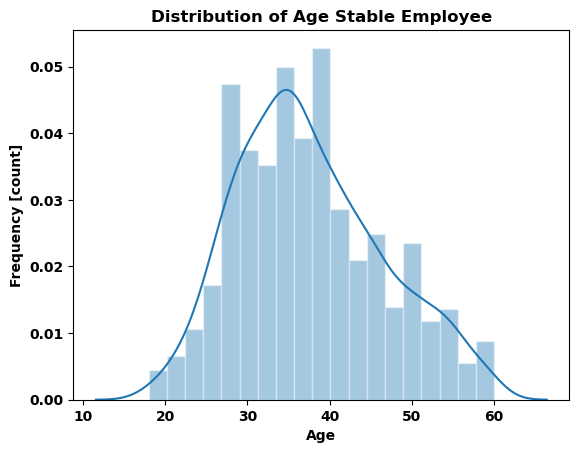

In [77]:
# Plot of Distribution of Age with Attrition
sb.histplot(
    No_Att['Age'], 
    kde=True, 
    stat="density", 
    kde_kws=dict(cut=3),
    alpha=.4, 
    edgecolor=(1, 1, 1, .4)
)

plt.xlabel('Age')
plt.ylabel('Frequency [count]')
plt.title('Distribution of Age Stable Employee')
plt.show();

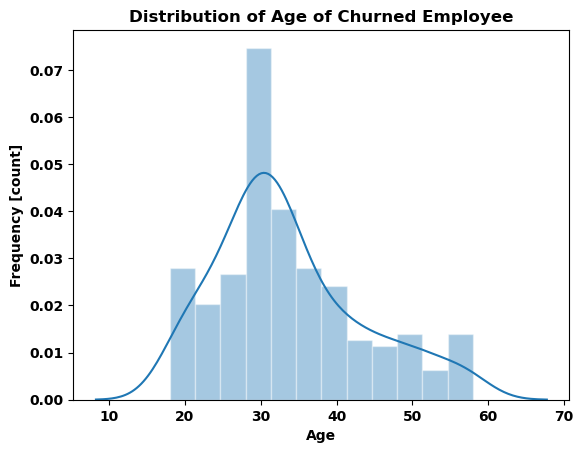

In [78]:
# Look at the distribution
sb.histplot(
    Yes_Att['Age'], 
    kde=True, 
    stat="density", 
    kde_kws=dict(cut=3),
    alpha=.4, 
    edgecolor=(1, 1, 1, .4)
)

plt.xlabel('Age')
plt.ylabel('Frequency [count]')
plt.title('Distribution of Age of Churned Employee')
plt.show();

From the distibution plot above, Employees who are stable tend to be most active arount the Ages of 25 - 55, with the average age of about 35years.

Also Employees who are churned have a distribution that is rightly skewed, with an avaerage age of about 30year. Employees above 40years are churned faster.

This shows that Employees above 35years are churned faster, when other causes of Attrition are at work.

### Is Income the main factor towards employee attrition?


In [79]:
inc_att = df[['Attrition', 'MonthlyIncome']]
inc_att = inc_att.value_counts()
inc_att.unstack(level=-1)

MonthlyIncome,1009,1051,1052,1081,1091,1102,1118,1129,1200,1223,...,19717,19740,19833,19845,19847,19859,19926,19943,19973,19999
Attrition,,,,,,,,,,,,,,,,,,,,,
No,NaN,1.0,1.0,NaN,NaN,NaN,NaN,1.0,1.0,1.0,...,1.0,1.0,1.0,NaN,1.0,NaN,1.0,1.0,1.0,1.0
Yes,1.0,NaN,NaN,1.0,1.0,1.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN


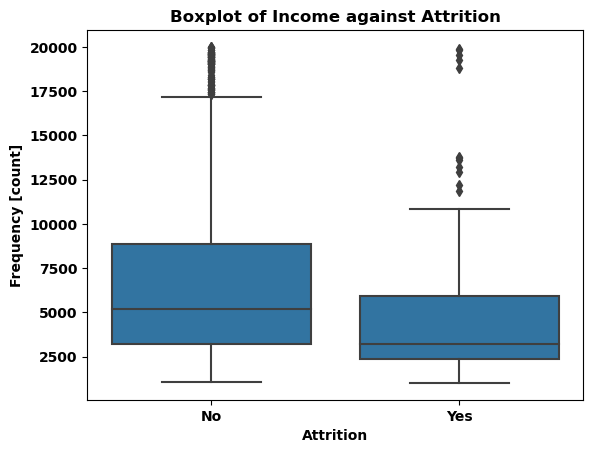

In [81]:
# Creating the order for box plot
order = df.Attrition.value_counts().index

# box plot of MonthlyIncome and Attrition
sb.boxplot(
    data=df, 
    x='Attrition', 
    y='MonthlyIncome', 
    color=base_color, order=order
);
# Funtion definig labels and title
x_y_t(
    'Attrition', 
    'Frequency [count]', 
    'Boxplot of Income against Attrition'
)


Income is not the main factor towards employee attrition rate. While it also impacts attrition rate, the boxplot above shows that even employees that are highly paid may still be lost to other factors that influence employee attrition.

In [87]:
# df.groupby('Attrition').value_counts(normalize=True).unstack(level=-1)

### How does work-life balance impact the overall attrition rate?

In [88]:
df['WorkLifeBalance'].value_counts()

3    893
2    344
4    153
1     80
Name: WorkLifeBalance, dtype: int64

In [89]:
df.groupby('Attrition')['WorkLifeBalance'].value_counts().unstack(level=-1)

WorkLifeBalance,1,2,3,4
Attrition,,,,
No,55,286,766,126
Yes,25,58,127,27


In [94]:
norm_WLB = df.groupby(
        'Attrition'
        )['WorkLifeBalance'].value_counts(normalize=True).unstack(level=-1)

norm_WLB

WorkLifeBalance,1,2,3,4
Attrition,,,,
No,0.044607,0.231955,0.621249,0.102190
Yes,0.105485,0.244726,0.535865,0.113924


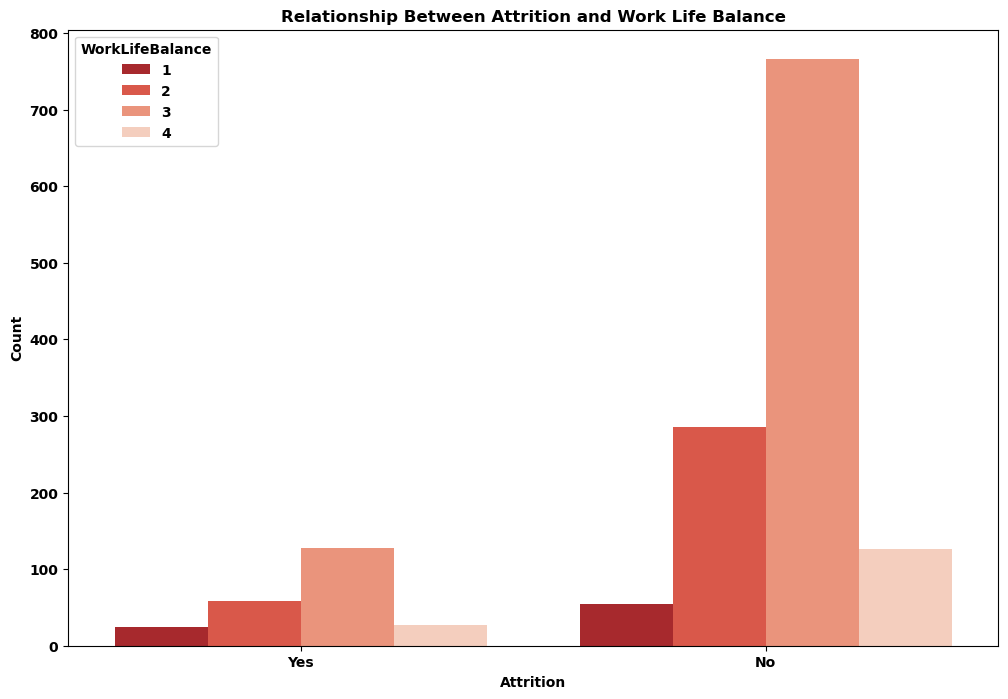

In [96]:
# plotting the Term of loan
plt.figure(figsize = [12, 8])

sb.countplot(
    data = df, 
    x = 'Attrition', 
    hue='WorkLifeBalance', 
    palette = 'Reds_r');

# Funtion definig labels and title
x_y_t(
    'Attrition', 
    'Count', 
    'Relationship Between Attrition and Work Life Balance'
)

WorkLifeBalance appears to be neutral on Attrition rate. From the normalized value count above, employees with a WorkLifeBalance of 3 churns the most and are most retained in a workplace.

This confirms that other factors, but WorkLifeBalnce affect attrition rate.

## Conclusion

Attrition Rate is affect by a combination of factors in a workplace, and management must ensure that the work place offers employees nothing short of good to best oppurtunities in other to reduce employee attrition